In [1]:
%config IPCompleter.greedy=True
%pylab inline

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

Populating the interactive namespace from numpy and matplotlib


# Music Genre Classification - Neural Network Training on CSV v2 file features

In [2]:
dataset_file = "datasets/dataV2.csv"

df = pd.read_csv(dataset_file, sep=",")
df.describe()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,cont5,cont6,cont7,spectram_flatness,tonnetz1,tonnetz2,tonnetz3,tonnetz4,tonnetz5,tonnetz6
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.380795,0.124698,1883.001208,1865.303842,3878.803772,0.101184,-162.754063,121.255273,-29.199931,54.109434,...,21.068699,25.304243,42.011566,0.001171,0.024199,0.022751,-0.000859,0.007904,0.000739,-0.000483
std,0.082699,0.062342,522.242739,339.144108,1096.400581,0.039370,95.151859,23.111192,20.168244,16.110998,...,3.139612,3.215191,5.889988,0.004498,0.088373,0.087442,0.057218,0.058348,0.016921,0.018316
min,0.171805,0.005014,549.065530,796.514455,710.220705,0.021877,-556.024780,42.361320,-99.755829,-3.247742,...,14.707758,18.454522,14.543139,0.000024,-0.280692,-0.279626,-0.269872,-0.213347,-0.083503,-0.080987
25%,0.321059,0.082679,1461.113254,1643.098517,3034.883732,0.071043,-213.648769,104.958897,-42.612360,45.396466,...,18.899340,22.919356,39.393112,0.000305,-0.027305,-0.028036,-0.033594,-0.025548,-0.007281,-0.010498
50%,0.385390,0.116670,1926.222388,1943.105990,4064.821254,0.097405,-138.674522,118.840340,-30.713336,54.597818,...,20.531552,24.822372,43.530784,0.000709,0.024605,0.019438,0.002340,0.009498,0.001412,-0.001173
75%,0.439446,0.167502,2277.180673,2110.350537,4748.075456,0.128231,-95.242519,135.433762,-17.951447,64.680765,...,22.887252,27.249788,46.144489,0.001278,0.072360,0.067379,0.034760,0.042833,0.010938,0.009652
max,0.667248,0.378549,3369.517356,2611.325445,6268.003765,0.257681,15.127309,197.522858,55.721581,98.046173,...,36.530988,39.303396,51.668599,0.108367,0.372279,0.409506,0.217829,0.243350,0.062162,0.075182


#### Project questions

**Q.8 What are the features types (numeric/textual/visual)?**

The dataset doesn't contain any null/nan values and every feature is quantitive continuous (except filename and label which are strings).

In [3]:
from sklearn import preprocessing

X = df.drop(["label", "filename"], axis=1).values

std_scale = preprocessing.StandardScaler().fit(X) # applying feature scaling because PCA uses euclidean distance to ocompute clusters

X = std_scale.transform(X)

y = df["label"].values

### Traininig a simple Neural network

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
encoder.fit(y)

y_encoded = encoder.transform(y)

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y_encoded)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Input(shape=X.shape[1:]),
    Dense(400, activation="relu"),
    Dense(200, activation="relu"),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax"),
])

model.compile(loss="sparse_categorical_crossentropy", # because classes are exclusive or else we would use  categorical_crossentropy
             optimizer=SGD(learning_rate=0.003), # Stochastic Gradient Descent, will use backpropoagation (reverse mode autodiff + Gradient Descent
             metrics=["accuracy"],)

model.summary()


# callback for early stopiing (add in the model callbacks array)
early_stopping_cb = EarlyStopping(patience=100,  # interupus training early if no progress
                                restore_best_weights=True) # keeps track of best weights to restore them at the end of training


#history = model.fit(X_train, y_train, epochs=500, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb])
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_valid, y_valid))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 400)               26000     
_________________________________________________________________
dense_43 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_44 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_45 (Dense)             (None, 10)                1010      
Total params: 127,310
Trainable params: 127,310
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
18/18 [==============================] - 0s 7ms/step - loss: 2.3021 - accuracy: 0.1352 - val_loss: 2.2866 - val_accuracy: 0.1117
Epoch 2/300
18/18 [==============================] - 0s 3ms/step - loss: 2.2599 - accuracy: 0.1637 - val_

18/18 [==============================] - 0s 3ms/step - loss: 1.2873 - accuracy: 0.6441 - val_loss: 1.5340 - val_accuracy: 0.5160
Epoch 53/300
18/18 [==============================] - 0s 3ms/step - loss: 1.2741 - accuracy: 0.6495 - val_loss: 1.5281 - val_accuracy: 0.5160
Epoch 54/300
18/18 [==============================] - 0s 3ms/step - loss: 1.2609 - accuracy: 0.6584 - val_loss: 1.5215 - val_accuracy: 0.5160
Epoch 55/300
18/18 [==============================] - 0s 3ms/step - loss: 1.2484 - accuracy: 0.6584 - val_loss: 1.5140 - val_accuracy: 0.5213
Epoch 56/300
18/18 [==============================] - 0s 3ms/step - loss: 1.2357 - accuracy: 0.6512 - val_loss: 1.5085 - val_accuracy: 0.5213
Epoch 57/300
18/18 [==============================] - 0s 3ms/step - loss: 1.2236 - accuracy: 0.6548 - val_loss: 1.5020 - val_accuracy: 0.5213
Epoch 58/300
18/18 [==============================] - 0s 3ms/step - loss: 1.2112 - accuracy: 0.6690 - val_loss: 1.4944 - val_accuracy: 0.5213
Epoch 59/300
18/18 

Epoch 110/300
18/18 [==============================] - 0s 3ms/step - loss: 0.7551 - accuracy: 0.8114 - val_loss: 1.2906 - val_accuracy: 0.5957
Epoch 111/300
18/18 [==============================] - 0s 3ms/step - loss: 0.7488 - accuracy: 0.8149 - val_loss: 1.2865 - val_accuracy: 0.5957
Epoch 112/300
18/18 [==============================] - 0s 3ms/step - loss: 0.7424 - accuracy: 0.8132 - val_loss: 1.2859 - val_accuracy: 0.6011
Epoch 113/300
18/18 [==============================] - 0s 3ms/step - loss: 0.7358 - accuracy: 0.8114 - val_loss: 1.2843 - val_accuracy: 0.6011
Epoch 114/300
18/18 [==============================] - 0s 3ms/step - loss: 0.7301 - accuracy: 0.8114 - val_loss: 1.2840 - val_accuracy: 0.6011
Epoch 115/300
18/18 [==============================] - 0s 3ms/step - loss: 0.7238 - accuracy: 0.8203 - val_loss: 1.2817 - val_accuracy: 0.6011
Epoch 116/300
18/18 [==============================] - 0s 3ms/step - loss: 0.7178 - accuracy: 0.8203 - val_loss: 1.2792 - val_accuracy: 0.5957

18/18 [==============================] - 0s 3ms/step - loss: 0.4735 - accuracy: 0.9075 - val_loss: 1.2024 - val_accuracy: 0.6011
Epoch 168/300
18/18 [==============================] - 0s 3ms/step - loss: 0.4690 - accuracy: 0.9093 - val_loss: 1.2014 - val_accuracy: 0.6064
Epoch 169/300
18/18 [==============================] - 0s 3ms/step - loss: 0.4652 - accuracy: 0.9075 - val_loss: 1.2005 - val_accuracy: 0.6064
Epoch 170/300
18/18 [==============================] - 0s 3ms/step - loss: 0.4611 - accuracy: 0.9093 - val_loss: 1.1998 - val_accuracy: 0.6064
Epoch 171/300
18/18 [==============================] - 0s 3ms/step - loss: 0.4578 - accuracy: 0.9075 - val_loss: 1.2012 - val_accuracy: 0.6117
Epoch 172/300
18/18 [==============================] - 0s 3ms/step - loss: 0.4550 - accuracy: 0.9093 - val_loss: 1.2006 - val_accuracy: 0.6064
Epoch 173/300
18/18 [==============================] - 0s 3ms/step - loss: 0.4503 - accuracy: 0.9110 - val_loss: 1.1989 - val_accuracy: 0.6064
Epoch 174/300

18/18 [==============================] - 0s 3ms/step - loss: 0.2989 - accuracy: 0.9484 - val_loss: 1.1705 - val_accuracy: 0.6383
Epoch 225/300
18/18 [==============================] - 0s 3ms/step - loss: 0.2966 - accuracy: 0.9484 - val_loss: 1.1692 - val_accuracy: 0.6383
Epoch 226/300
18/18 [==============================] - 0s 3ms/step - loss: 0.2941 - accuracy: 0.9502 - val_loss: 1.1691 - val_accuracy: 0.6330
Epoch 227/300
18/18 [==============================] - 0s 4ms/step - loss: 0.2919 - accuracy: 0.9520 - val_loss: 1.1682 - val_accuracy: 0.6330
Epoch 228/300
18/18 [==============================] - 0s 3ms/step - loss: 0.2896 - accuracy: 0.9537 - val_loss: 1.1721 - val_accuracy: 0.6383
Epoch 229/300
18/18 [==============================] - 0s 3ms/step - loss: 0.2876 - accuracy: 0.9537 - val_loss: 1.1690 - val_accuracy: 0.6383
Epoch 230/300
18/18 [==============================] - 0s 3ms/step - loss: 0.2848 - accuracy: 0.9537 - val_loss: 1.1714 - val_accuracy: 0.6383
Epoch 231/300

18/18 [==============================] - 0s 3ms/step - loss: 0.1941 - accuracy: 0.9786 - val_loss: 1.1796 - val_accuracy: 0.6489
Epoch 282/300
18/18 [==============================] - 0s 3ms/step - loss: 0.1925 - accuracy: 0.9786 - val_loss: 1.1791 - val_accuracy: 0.6489
Epoch 283/300
18/18 [==============================] - 0s 3ms/step - loss: 0.1911 - accuracy: 0.9751 - val_loss: 1.1777 - val_accuracy: 0.6489
Epoch 284/300
18/18 [==============================] - 0s 3ms/step - loss: 0.1900 - accuracy: 0.9786 - val_loss: 1.1773 - val_accuracy: 0.6489
Epoch 285/300
18/18 [==============================] - 0s 3ms/step - loss: 0.1884 - accuracy: 0.9786 - val_loss: 1.1799 - val_accuracy: 0.6489
Epoch 286/300
18/18 [==============================] - 0s 3ms/step - loss: 0.1872 - accuracy: 0.9804 - val_loss: 1.1804 - val_accuracy: 0.6489
Epoch 287/300
18/18 [==============================] - 0s 3ms/step - loss: 0.1856 - accuracy: 0.9786 - val_loss: 1.1820 - val_accuracy: 0.6489
Epoch 288/300

8/8 [==============================] - 0s 901us/step - loss: 1.1576 - accuracy: 0.6240


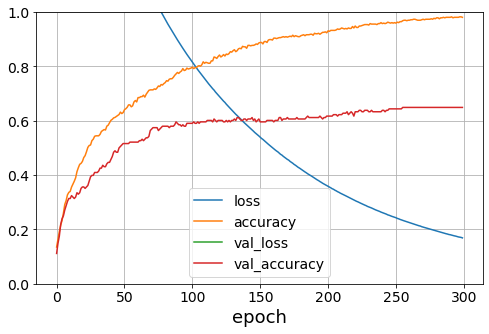

In [23]:
mse_test = model.evaluate(X_test, y_test)

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel("epoch")
plt.show()

In [57]:
# model_path = "./models/musicgenre_nn_classifier_v1.h5"
# model.save(model_path)
# model = keras.models.load_model(model_path)
model.predict(X)

array([[2.00138465e-01, 3.94738168e-02, 3.33348615e-03, ...,
        6.01316839e-02, 3.20363306e-02, 1.26977518e-01],
       [7.72425056e-01, 1.49503620e-02, 8.36680934e-04, ...,
        2.66272984e-02, 3.03274971e-02, 2.37962008e-02],
       [6.27968192e-01, 1.32484396e-03, 2.68236369e-01, ...,
        1.62915550e-02, 7.16046849e-03, 5.35864234e-02],
       ...,
       [2.80060526e-03, 4.03544691e-04, 8.62967223e-02, ...,
        3.15476238e-04, 8.79695232e-04, 8.24020624e-01],
       [2.51880642e-02, 3.17213731e-03, 1.19671881e-01, ...,
        1.09294141e-02, 1.31842792e-01, 6.84222519e-01],
       [3.98156494e-02, 3.68373655e-03, 1.17283374e-01, ...,
        8.73527097e-05, 2.36441917e-03, 8.13091755e-01]], dtype=float32)

Class 0: blues
Class 1: classical
Class 2: country
Class 3: disco
Class 4: hiphop
Class 5: jazz
Class 6: metal
Class 7: pop
Class 8: reggae
Class 9: rock


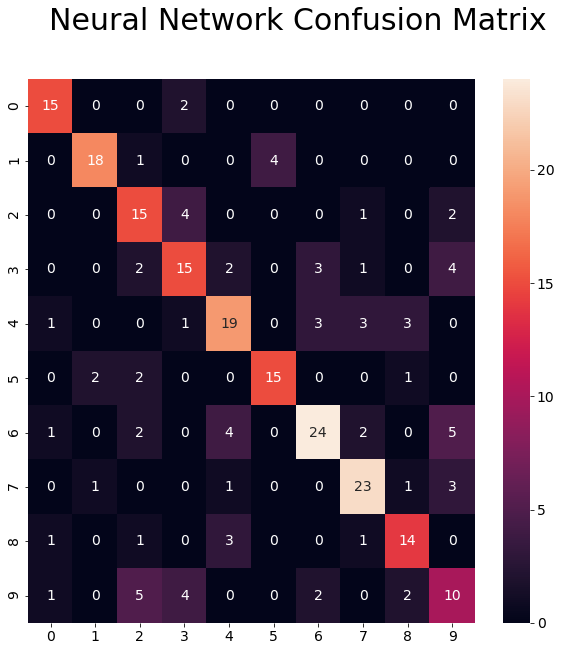

In [58]:
from sklearn.metrics import confusion_matrix
from ml_toolbox import show_confusion_matrix

y_pred_nn = np.argmax(model.predict(X_test), axis=-1)

show_confusion_matrix(y_test, y_pred_nn, encoder, "Neural Network Confusion Matrix")